# E-COMMERCE PRODUCT RANGE ANALYSIS
by Irene Undiandeye

INTRODUCTION
The dataset contains the transaction history of an online store that sells household goods.
The file ecommerce_dataset_us.csv contains the following columns:
- InvoiceNo — order identifier
- StockCode — item identifier
- Description — item name
- Quantity
- InvoiceDate — order date
- UnitPrice — price per item
- CustomerID

TABLE OF CONTENT
- Data acessing and cleaning
- Costumer behaviour analysis
- Products analysis
- General performancr of the business
- Hypothesis testing
- Recommendations and conclusion

In [132]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind
import statsmodels.api as sm
from scipy.stats import linregress
from scipy import stats


In [2]:
df = pd.read_csv('ecommerce_dataset_us.csv', sep='\t')
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,11/29/2018 08:26,2.55,17850.0
1,536365,71053,WHITE METAL LANTERN,6,11/29/2018 08:26,3.39,17850.0
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,11/29/2018 08:26,2.75,17850.0
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,11/29/2018 08:26,3.39,17850.0
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,11/29/2018 08:26,3.39,17850.0
...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/07/2019 12:50,0.85,12680.0
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/07/2019 12:50,2.10,12680.0
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/07/2019 12:50,4.15,12680.0
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/07/2019 12:50,4.15,12680.0


In [3]:
df.CustomerID.isnull().sum()

135080

In [4]:
#find the total number of produnct available for sale by the shop 
print(df['StockCode'].nunique())

4070


In [5]:
#find the total number of customers that shop from the shop
df['CustomerID'].nunique()

4372

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 7 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 28.9+ MB


In [7]:
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
dtype: int64

# CLEANING AND TIDING THE DATA

In [8]:
df2 = df.copy ()
df2.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,11/29/2018 08:26,2.55,17850.0
1,536365,71053,WHITE METAL LANTERN,6,11/29/2018 08:26,3.39,17850.0
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,11/29/2018 08:26,2.75,17850.0
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,11/29/2018 08:26,3.39,17850.0
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,11/29/2018 08:26,3.39,17850.0


In [9]:
#convert the InvoiceDate datatype from object to datetime
df2['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

In [10]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 7 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(3)
memory usage: 28.9+ MB


In [11]:
#extract day of the week from the date and create a new column
df2['day'] = df2['InvoiceDate'].dt.day_name()

In [12]:
df2['month'] = df2['InvoiceDate'].dt.month_name()

In [13]:
#create sales amount column
df2['Sales_Amounts'] = df2['UnitPrice'] * df2[ 'Quantity']

In [14]:
df2.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,day,month,Sales_Amounts
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2018-11-29 08:26:00,2.55,17850.0,Thursday,November,15.30
1,536365,71053,WHITE METAL LANTERN,6,2018-11-29 08:26:00,3.39,17850.0,Thursday,November,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2018-11-29 08:26:00,2.75,17850.0,Thursday,November,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2018-11-29 08:26:00,3.39,17850.0,Thursday,November,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2018-11-29 08:26:00,3.39,17850.0,Thursday,November,20.34


In [15]:
df2.to_csv ('e-commerce-masterdata.csv', index = False)

In [16]:
dfclean = pd.read_csv('e-commerce-masterdata.csv')

In [17]:
dfclean.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,day,month,Sales_Amounts
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2018-11-29 08:26:00,2.55,17850.0,Thursday,November,15.30
1,536365,71053,WHITE METAL LANTERN,6,2018-11-29 08:26:00,3.39,17850.0,Thursday,November,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2018-11-29 08:26:00,2.75,17850.0,Thursday,November,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2018-11-29 08:26:00,3.39,17850.0,Thursday,November,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2018-11-29 08:26:00,3.39,17850.0,Thursday,November,20.34


In [18]:
dfclean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 10 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   InvoiceNo      541909 non-null  object 
 1   StockCode      541909 non-null  object 
 2   Description    540455 non-null  object 
 3   Quantity       541909 non-null  int64  
 4   InvoiceDate    541909 non-null  object 
 5   UnitPrice      541909 non-null  float64
 6   CustomerID     406829 non-null  float64
 7   day            541909 non-null  object 
 8   month          541909 non-null  object 
 9   Sales_Amounts  541909 non-null  float64
dtypes: float64(3), int64(1), object(6)
memory usage: 41.3+ MB


In [19]:
dfclean['InvoiceDate'] = pd.to_datetime(dfclean['InvoiceDate'])

In [20]:
dfclean.loc[dfclean['Quantity'] < 0]


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,day,month,Sales_Amounts
141,C536379,D,Discount,-1,2018-11-29 09:41:00,27.50,14527.0,Thursday,November,-27.50
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2018-11-29 09:49:00,4.65,15311.0,Thursday,November,-4.65
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2018-11-29 10:24:00,1.65,17548.0,Thursday,November,-19.80
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2018-11-29 10:24:00,0.29,17548.0,Thursday,November,-6.96
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2018-11-29 10:24:00,0.29,17548.0,Thursday,November,-6.96
...,...,...,...,...,...,...,...,...,...,...
540449,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,2019-12-07 09:57:00,0.83,14397.0,Saturday,December,-9.13
541541,C581499,M,Manual,-1,2019-12-07 10:28:00,224.69,15498.0,Saturday,December,-224.69
541715,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,2019-12-07 11:57:00,10.95,15311.0,Saturday,December,-54.75
541716,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,2019-12-07 11:58:00,1.25,17315.0,Saturday,December,-1.25


In [21]:
dfclean.loc[dfclean['UnitPrice'] < 0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,day,month,Sales_Amounts
299983,A563186,B,Adjust bad debt,1,2019-08-10 14:51:00,-11062.06,NaN,Saturday,August,-11062.06
299984,A563187,B,Adjust bad debt,1,2019-08-10 14:52:00,-11062.06,NaN,Saturday,August,-11062.06


# ANALYSE INSIGHTS

1. COSTUMER BEHAVIOUR ANALYSIS

In [22]:
#1a Calculate the total number of costumers ( the sum of unique costumer id)
total_customer = dfclean['CustomerID'].nunique()
total_customer



4372

In [23]:
# a data frame to show the unique users
total_user = pd.DataFrame(dfclean['CustomerID'].unique())
total_user.columns = ['CustomerID']
total_user

,CustomerID
0,17850.0
1,13047.0
2,12583.0
3,13748.0
4,15100.0
...,...
4368,13436.0
4369,15520.0
4370,13298.0
4371,14569.0


The analysis above shows that the ecommerce company has a total of 4372 unique costumers who buy from the store.

In [24]:
#1b find the number of days since the last purchase of the customer(recency of the costumer)
total_purchase = dfclean.groupby('CustomerID').InvoiceDate.max().reset_index()
total_purchase.columns = ['CustomerID','Purchase_Date']
total_purchase['Recency'] = (total_purchase['Purchase_Date'].max() - total_purchase['Purchase_Date']).dt.days

#merge the total purchase and total users into one data frame
customer_recency = pd.merge(total_user, total_purchase[['CustomerID','Recency']], on='CustomerID')
customer_recency

,CustomerID,Recency
0,17850.0,301
1,13047.0,31
2,12583.0,2
3,13748.0,95
4,15100.0,329
...,...,...
4367,13436.0,1
4368,15520.0,1
4369,13298.0,0
4370,14569.0,0


In [26]:
#sort to find the most recent customer
most_recent = customer_recency.sort_values(['Recency'], ascending=True).head(10)
print(most_recent)

      CustomerID  Recency
4371     12713.0        0
1164     13883.0        0
2828     16358.0        0
2832     13510.0        0
99       15694.0        0
1131     16401.0        0
2864     16794.0        0
1104     17364.0        0
2895     17490.0        0
93       14606.0        0


In [27]:
#sort to find the less recent customer
less_recent = customer_recency.sort_values(['Recency'], ascending=False).head(10)
print(less_recent)


     CustomerID  Recency
47      14729.0      373
34      16583.0      373
30      17908.0      373
26      12791.0      373
11      18074.0      373
19      13747.0      373
40      17968.0      373
106     17855.0      372
56      14237.0      372
61      15350.0      372


In [28]:
#1c Find the number of transactions made over a given period (frequency of the  costumers)
c_frequency = dfclean.groupby('CustomerID').InvoiceDate.nunique().reset_index()
c_frequency.columns = ['CustomerID','Frequency']

#merge total user and c_frequency into a datframe(customer_frequency)
customer_frequency = pd.merge(total_user, c_frequency, on='CustomerID')
customer_frequency

,CustomerID,Frequency
0,17850.0,34
1,13047.0,17
2,12583.0,18
3,13748.0,4
4,15100.0,6
...,...,...
4367,13436.0,1
4368,15520.0,1
4369,13298.0,1
4370,14569.0,1


In [29]:
# find the most frequent customer
most_frequent = customer_frequency.sort_values(['Frequency'], ascending=False).head(10)
print(most_frequent)

     CustomerID  Frequency
67      14911.0        248
48      12748.0        225
69      17841.0        168
93      14606.0        129
8       15311.0        118
258     13089.0        114
174     12971.0         86
9       14527.0         85
908     14646.0         77
20      13408.0         77


In [30]:
dfclean['CustomerID'] = dfclean['CustomerID'].astype(object)

In [31]:
#PRODUCT BOUGHT BY THE CUSTOMER WITH THE HIGHEST FREQUENCY
most_frQ_cust = dfclean.loc[(dfclean['CustomerID'] == 14911.0)]
most_bought_product= most_frQ_cust.groupby('Description').Quantity.sum().reset_index()
most_bought_product.columns = ['Description', 'Quantity']
most_bought_product.sort_values(['Quantity'], ascending=False).head(10)

,Description,Quantity
63,60 CAKE CASES VINTAGE CHRISTMAS,1200
1400,SET OF 20 VINTAGE CHRISTMAS NAPKINS,948
1706,VINTAGE SNAP CARDS,804
37,36 DOILIES VINTAGE CHRISTMAS,780
1735,WHITE HANGING HEART T-LIGHT HOLDER,746
502,EASTER DECORATION HANGING BUNNY,704
1043,PACK OF 72 RETROSPOT CAKE CASES,672
1777,WOODEN STAR CHRISTMAS SCANDINAVIAN,636
1181,POPCORN HOLDER,619
1786,WORLD WAR 2 GLIDERS ASSTD DESIGNS,528


We can see that most of the items the most frequent costumer are gift items and based on the quatity bought its seems to be a rertailer buying item for retail

In [32]:
#1c Find less frequent costumer(this is to know if there are customers who did not return after their first purchase)
less_frequent = customer_frequency.sort_values(['Frequency'], ascending=True).head(10)
print(less_frequent)

      CustomerID  Frequency
2185     14957.0          1
2801     16849.0          1
2807     15386.0          1
2809     14542.0          1
2817     14375.0          1
2818     17124.0          1
2819     17987.0          1
2796     13682.0          1
2820     13395.0          1
2834     14241.0          1


In [33]:
#1d find the amount spent over a given period of time(monetary value per customer)
c_revenue = dfclean.groupby('CustomerID').Sales_Amounts.sum().reset_index()

#merge it with our main dataframe
customer_revenue = pd.merge(total_user, c_revenue, on='CustomerID')
customer_revenue

,CustomerID,Sales_Amounts
0,17850.0,5288.63
1,13047.0,3079.10
2,12583.0,7187.34
3,13748.0,948.25
4,15100.0,635.10
...,...,...
4367,13436.0,196.89
4368,15520.0,343.50
4369,13298.0,360.00
4370,14569.0,227.39


In [34]:
dfclean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 10 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   InvoiceNo      541909 non-null  object        
 1   StockCode      541909 non-null  object        
 2   Description    540455 non-null  object        
 3   Quantity       541909 non-null  int64         
 4   InvoiceDate    541909 non-null  datetime64[ns]
 5   UnitPrice      541909 non-null  float64       
 6   CustomerID     406829 non-null  object        
 7   day            541909 non-null  object        
 8   month          541909 non-null  object        
 9   Sales_Amounts  541909 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(6)
memory usage: 41.3+ MB


In [35]:
RF = pd.merge(customer_recency, customer_frequency[['CustomerID', 'Frequency']], on='CustomerID')
RFM = pd.merge(RF, customer_revenue[['CustomerID', 'Sales_Amounts']], on='CustomerID')
RFM.rename(columns = {'Sales_Amounts' : 'Monetary'}, inplace = True)
RFM

,CustomerID,Recency,Frequency,Monetary
0,17850.0,301,34,5288.63
1,13047.0,31,17,3079.10
2,12583.0,2,18,7187.34
3,13748.0,95,4,948.25
4,15100.0,329,6,635.10
...,...,...,...,...
4367,13436.0,1,1,196.89
4368,15520.0,1,1,343.50
4369,13298.0,0,1,360.00
4370,14569.0,0,1,227.39


In [36]:
# create labels and assign them to percentile groups 
R_labels = range(4, 0, -1)
R_groups = pd.qcut(RFM['Recency'], q=4, labels = R_labels, duplicates ='drop')
F_labels = range(1, 4)
F_groups = pd.qcut(RFM['Frequency'], q=4, labels = F_labels, duplicates ='drop')
M_labels = range(1, 5)
M_groups = pd.qcut(RFM['Monetary'], q=4, labels = M_labels, duplicates ='drop')
#x.rank(method='first')


In [37]:
# make a new column for group labels
RFM['R'] = R_groups.values
RFM['F'] = F_groups.values
RFM['M'] = M_groups.values
#RFM= RFM.assign(R = R_groups.values, F = F_groups.values, M = M_groups.values)
RFM.head()

,CustomerID,Recency,Frequency,Monetary,R,F,M
0,17850.0,301,34,5288.63,1,3,4
1,13047.0,31,17,3079.10,3,3,4
2,12583.0,2,18,7187.34,4,3,4
3,13748.0,95,4,948.25,2,2,3
4,15100.0,329,6,635.10,1,3,2


In [38]:
# sum up the three columns
RFM['RFM_Segment'] = RFM.apply(lambda x: str(x['R']) + str(x['F']) + str(x['M']), axis = 1)
RFM['RFM_Score'] = RFM[['R', 'F', 'M']].sum(axis = 1)
RFM.head()



,CustomerID,Recency,Frequency,Monetary,R,F,M,RFM_Segment,RFM_Score
0,17850.0,301,34,5288.63,1,3,4,1.03.04.0,8
1,13047.0,31,17,3079.10,3,3,4,3.03.04.0,10
2,12583.0,2,18,7187.34,4,3,4,4.03.04.0,11
3,13748.0,95,4,948.25,2,2,3,2.02.03.0,7
4,15100.0,329,6,635.10,1,3,2,1.03.02.0,6


In [39]:
 #Define rfm_level function
def rfm_level(df):
    if df['RFM_Score'] >= 9:
        return 'Can\'t Loose Them'
    elif ((df['RFM_Score'] >= 8) and (df['RFM_Score'] < 9)):
        return 'Champions'
    elif ((df['RFM_Score'] >= 7) and (df['RFM_Score'] < 8)):
        return 'Loyal'
    elif ((df['RFM_Score'] >= 6) and (df['RFM_Score'] < 7)):
        return 'Potential'
    elif ((df['RFM_Score'] >= 5) and (df['RFM_Score'] < 6)):
        return 'Promising'
    elif ((df['RFM_Score'] >= 4) and (df['RFM_Score'] < 5)):
        return 'Needs Attention'
    else:
        return 'Require Activation'
# Create a new variable RFM_Level
RFM['RFM_Level'] = RFM.apply(rfm_level, axis=1)

In [40]:
RFM

,CustomerID,Recency,Frequency,Monetary,R,F,M,RFM_Segment,RFM_Score,RFM_Level
0,17850.0,301,34,5288.63,1,3,4,1.03.04.0,8,Champions
1,13047.0,31,17,3079.10,3,3,4,3.03.04.0,10,Can't Loose Them
2,12583.0,2,18,7187.34,4,3,4,4.03.04.0,11,Can't Loose Them
3,13748.0,95,4,948.25,2,2,3,2.02.03.0,7,Loyal
4,15100.0,329,6,635.10,1,3,2,1.03.02.0,6,Potential
...,...,...,...,...,...,...,...,...,...,...
4367,13436.0,1,1,196.89,4,1,1,4.01.01.0,6,Potential
4368,15520.0,1,1,343.50,4,1,2,4.01.02.0,7,Loyal
4369,13298.0,0,1,360.00,4,1,2,4.01.02.0,7,Loyal
4370,14569.0,0,1,227.39,4,1,1,4.01.01.0,6,Potential


In [41]:
RFM.to_csv ('customer_RFM.csv', index = False)

In [77]:
RFM.groupby('RFM_Level').CustomerID.count().reset_index()

,RFM_Level,CustomerID
0,Can't Loose Them,1217
1,Champions,400
2,Loyal,439
3,Needs Attention,593
4,Potential,595
5,Promising,609
6,Require Activation,519


Text(0.5, 0.98, 'The number of customers in the different RFM levels')

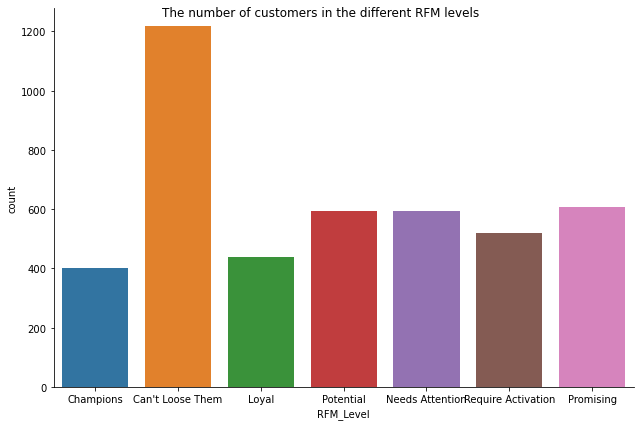

In [94]:

RFM_chart= sns.catplot(data=RFM, x='RFM_Level', kind='count', height=6, aspect=1.5)
RFM_chart.fig.suptitle('The number of customers in the different RFM levels')

From the custumer clustering we can see that we have 1217 committed customer that we can't loose, 400 that are champions, 439 loyal customers. The company needs to check what they are doing right to keep them and continue doing it and also find out what they can do better to improve their experience. On the other hand, we have 593 customers that need attention, 595 that have potential, 609 promising customers and 519 customers that needs activation. I recommend that the company marketing team should design a marketing strategy tailored to this different groups of customers to increase their patronage.

In [43]:
dfclean["DayOfWeek"] = dfclean["InvoiceDate"].dt.day_name()

In [108]:
dfclean['year'] = pd.DatetimeIndex(dfclean['InvoiceDate']).year

In [109]:
dfclean.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,day,month,Sales_Amounts,DayOfWeek,Dates,Season,year
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2018-11-29 08:26:00,2.55,17850.0,Thursday,November,15.30,Thursday,2018-11-29,Fall,2018
1,536365,71053,WHITE METAL LANTERN,6,2018-11-29 08:26:00,3.39,17850.0,Thursday,November,20.34,Thursday,2018-11-29,Fall,2018
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2018-11-29 08:26:00,2.75,17850.0,Thursday,November,22.00,Thursday,2018-11-29,Fall,2018
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2018-11-29 08:26:00,3.39,17850.0,Thursday,November,20.34,Thursday,2018-11-29,Fall,2018
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2018-11-29 08:26:00,3.39,17850.0,Thursday,November,20.34,Thursday,2018-11-29,Fall,2018


In [128]:
yearG = (dfclean.groupby('month')['year']).value_counts().unstack()
yearG

year,2018,2019
month,,
April,NaN,29107.0
August,NaN,36496.0
December,37264.0,19744.0
February,NaN,27018.0
January,NaN,38132.0
July,NaN,41060.0
June,NaN,34857.0
March,NaN,35713.0
May,NaN,39622.0


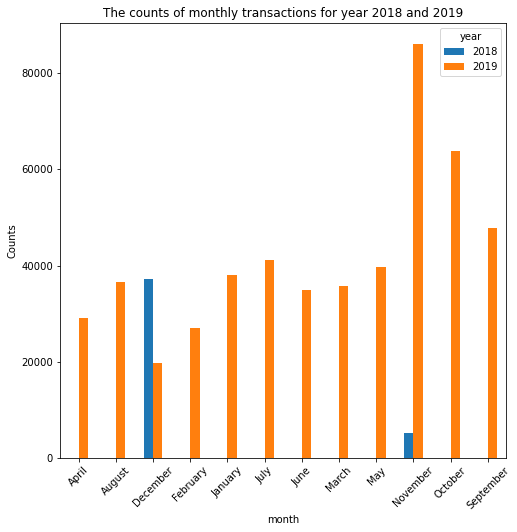

In [129]:
dfclean.groupby('month')['year'].value_counts().unstack().plot.bar(figsize=(8, 8), title=('The counts of monthly transactions for year 2018 and 2019'))
plt.xticks(rotation=45)
plt.ylabel('Counts');

Comparing the sales of each month for the years 2018 and 2019 we see that the analysis covers November 2018 and December 2019. comparing the sales of November and December for both years we see that the sales increased significantly in November 2019 as against 2018 however in December 2019 the sales decreased compared to December 2018. I recommend that the marketing team finds out why the was a drop in sales in 2019 and proffer a solution to it

In [44]:
#1d Find day of the week with the highest purchases
day_of_week  = dfclean.groupby('DayOfWeek').CustomerID.nunique().reset_index()
day_of_week

,DayOfWeek,CustomerID
0,Friday,2194
1,Monday,1247
2,Saturday,1689
3,Thursday,1917
4,Tuesday,1769
5,Wednesday,1859


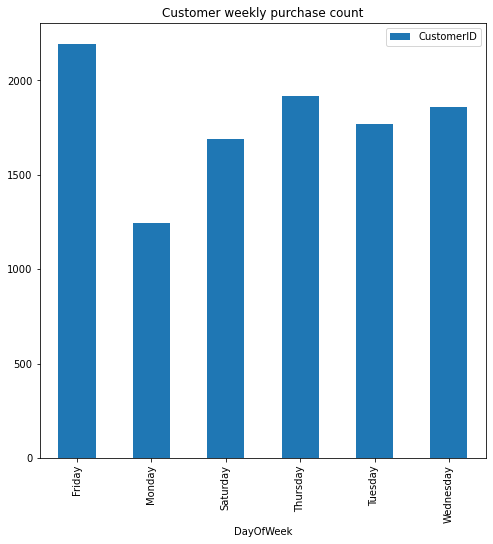

In [45]:
#1e Find day of the week with the lowest
day_of_week.plot.bar( x = 'DayOfWeek', y = ["CustomerID"], title="Customer weekly purchase count", figsize=(8, 8));
plt.show()

In [46]:
#1f.  group by invoice number to know the total number of item purchased per basket
total_basket  = dfclean.groupby('InvoiceNo').Quantity.sum().reset_index()
total_basket

,InvoiceNo,Quantity
0,536365,40
1,536366,12
2,536367,83
3,536368,15
4,536369,3
...,...,...
25895,C581484,-80995
25896,C581490,-23
25897,C581499,-1
25898,C581568,-5


2. PRODUCTS ANALYSIS

In [130]:
#find the quantity of each product
purchased_product  = dfclean.groupby('Description').Quantity.sum().reset_index()
purchased_product.head(20)


,Description,Quantity
0,4 PURPLE FLOCK DINNER CANDLES,144
1,50'S CHRISTMAS GIFT BAG LARGE,1913
2,DOLLY GIRL BEAKER,2448
3,I LOVE LONDON MINI BACKPACK,389
4,I LOVE LONDON MINI RUCKSACK,1
5,NINE DRAWER OFFICE TIDY,59
6,OVAL WALL MIRROR DIAMANTE,233
7,RED SPOT GIFT BAG LARGE,1727
8,SET 2 TEA TOWELS I LOVE LONDON,2781
9,SPACEBOY BABY GIFT SET,493


In [48]:
purchased_product.to_csv ('product_quality', index = False)

In [49]:
#2a Find the most purchased product (stockID with the highest quantity purchased)
most_purchaseditem= purchased_product.sort_values('Quantity',ascending=False).head(10)
most_purchaseditem

,Description,Quantity
4009,WORLD WAR 2 GLIDERS ASSTD DESIGNS,53847
1866,JUMBO BAG RED RETROSPOT,47363
244,ASSORTED COLOUR BIRD ORNAMENT,36381
2740,POPCORN HOLDER,36334
2395,PACK OF 72 RETROSPOT CAKE CASES,36039
3918,WHITE HANGING HEART T-LIGHT HOLDER,35317
2803,RABBIT NIGHT LIGHT,30680
2161,MINI PAINT SET VINTAGE,26437
2361,PACK OF 12 LONDON TISSUES,26315
2393,PACK OF 60 PINK PAISLEY CAKE CASES,24753


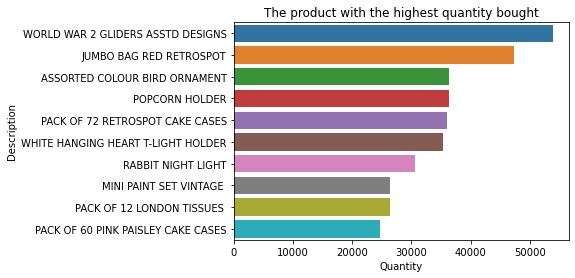

In [131]:
proQ_chart = sns.barplot(data=most_purchaseditem, x='Quantity', y='Description').set(title= 'The product with the highest quantity bought')
plt.show()

In [50]:
#2b Find the least purchased product (stock id with the lowest quantity purchased)
less = purchased_product.loc[(purchased_product.Quantity > 0)] 
less_purchaseditem= less.sort_values('Quantity',ascending=True).head(10)
less_purchaseditem

,Description,Quantity
2241,MUMMY MOUSE RED GINGHAM RIBBON,1
2306,OCEAN SCENT CANDLE JEWELLED DRAWER,1
456,BLUE CRYSTAL BOOT PHONE CHARM,1
3086,SET 10 CARDS CHRISTMAS BAUBLE 16954,1
3084,SET 10 CARDS 3 WISE MEN 17107,1
1059,DOLPHIN WINDMILL,1
3205,SET OF 3 PINK FLYING DUCKS,1
3065,SCALLOP SHELL SOAP DISH,1
1119,DUSTY PINK CHRISTMAS TREE 30CM,1
2259,NECKLACE+BRACELET SET PINK DAISY,1


In [51]:
#The items and the revenue generated within the period
item_rev  = dfclean.groupby('Description').Sales_Amounts.sum().reset_index()
item_rev

,Description,Sales_Amounts
0,4 PURPLE FLOCK DINNER CANDLES,290.80
1,50'S CHRISTMAS GIFT BAG LARGE,2341.13
2,DOLLY GIRL BEAKER,2882.50
3,I LOVE LONDON MINI BACKPACK,1628.17
4,I LOVE LONDON MINI RUCKSACK,4.15
...,...,...
4218,wrongly marked carton 22804,0.00
4219,wrongly marked. 23343 in box,0.00
4220,wrongly sold (22719) barcode,0.00
4221,wrongly sold as sets,0.00


In [52]:
item_rev.to_csv ('product_sales', index = False)

In [53]:
#the items that generated the most revenue within the period
most_rev = item_rev.sort_values(['Sales_Amounts'], ascending=False).head(10)
most_rev 

,Description,Sales_Amounts
1098,DOTCOM POSTAGE,206245.48
2915,REGENCY CAKESTAND 3 TIER,164762.19
3918,WHITE HANGING HEART T-LIGHT HOLDER,99668.47
2471,PARTY BUNTING,98302.98
1866,JUMBO BAG RED RETROSPOT,92356.03
2803,RABBIT NIGHT LIGHT,66756.59
2753,POSTAGE,66230.64
2439,PAPER CHAIN KIT 50'S CHRISTMAS,63791.94
244,ASSORTED COLOUR BIRD ORNAMENT,58959.73
773,CHILLI LIGHTS,53768.06


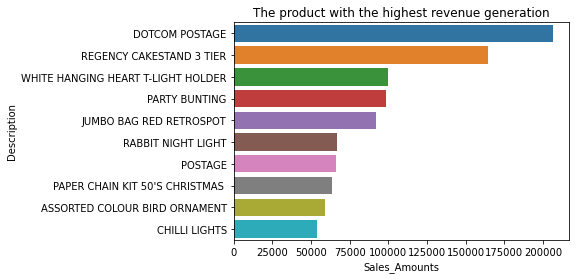

In [106]:
sns.barplot(data=most_rev, x='Sales_Amounts', y='Description').set(title= 'The product with the highest revenue generation')
plt.show()

The 5 products the generateed the most revenue for the company within the period are DOTCOM POSTAGE, REGENCY CAKESTAND 3 TIER, WHITE HANGING HEART T-LIGHT HOLDER, PARTY BUNTING and JUMBO BAG RED RETROSPOT with revenue of 206245.48, 164762.19, 99668.47, 98302.98 and 92356.03 respectively.

In [54]:
# The items that generated the least revenue within the perion
less_rev = item_rev.loc[(item_rev.Sales_Amounts > 0)] 
less_rev= less_rev.sort_values('Sales_Amounts',ascending=True).head(10)
less_rev

,Description,Sales_Amounts
2401,PADS TO MATCH ALL CUSHIONS,0.003
1729,HEN HOUSE W CHICK IN NEST,0.420
3126,SET 12 COLOURING PENCILS DOILEY,0.650
3897,WHITE BEADED GARLAND STRING 20LIGHT,0.800
3769,VINTAGE BLUE TINSEL REEL,0.840
2576,PINK CRYSTAL GUITAR PHONE CHARM,0.850
1689,HAPPY BIRTHDAY CARD TEDDY/CAKE,0.950
688,CAT WITH SUNGLASSES BLANK CARD,0.950
64,3 WICK CHRISTMAS BRIAR CANDLE,0.970
113,60 GOLD AND SILVER FAIRY CAKE CASES,1.100


Within the period of the analysis the 5 product that generated the least revenue for the company are PADS TO MATCH ALL CUSHIONS followed by HEN HOUSE W CHICK IN NEST then SET 12 COLOURING PENCILS DOILEY, WHITE BEADED GARLAND STRING 20LIGHT and VINTAGE BLUE TINSEL REEL with revenue of 0.003, 0.420, 0.650, 0.800 and 0.840 respectively.

3. GENERAL PERFORMANCE OF THE BUSINESS

In [55]:
#3a Group by date to know the date that had the most purshases(to see if the purchase is reducing or increasing)
dfclean['Dates'] = pd.to_datetime(dfclean['InvoiceDate']).dt.date
purchase_date = dfclean.groupby('Dates').Quantity.sum().reset_index()
purchase_date

,Dates,Quantity
0,2018-11-29,26814
1,2018-11-30,21023
2,2018-12-01,14830
3,2018-12-03,16395
4,2018-12-04,21419
...,...,...
300,2019-12-03,44119
301,2019-12-04,29026
302,2019-12-05,39612
303,2019-12-06,34460


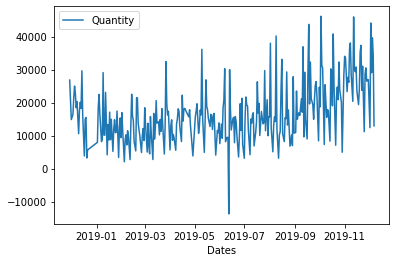

In [56]:
ax = purchase_date.plot.line(x='Dates', y='Quantity')

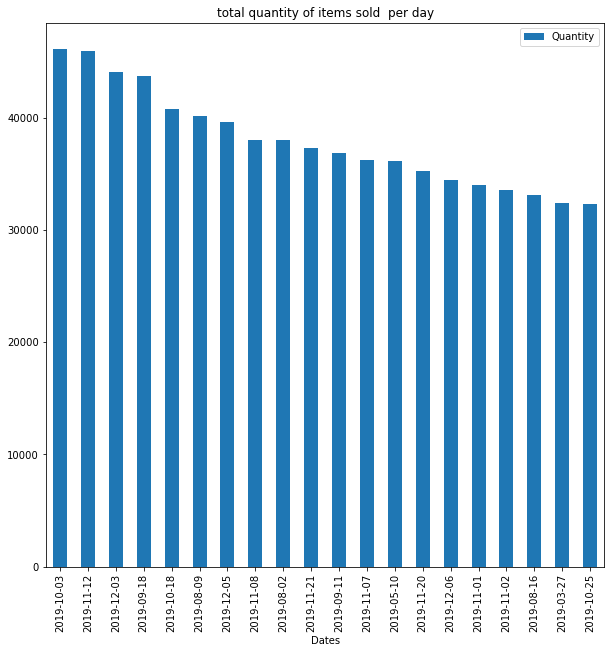

In [57]:
purchase_datesorted_desc= purchase_date.sort_values('Quantity',ascending=False).head(20)
purchase_datesorted_desc.plot.bar( x = 'Dates', y = ["Quantity"], title="total quantity of items sold  per day", figsize=(10, 10));
plt.show()

In [58]:
#3b Calculate the total number of product availiable in the store(unique items)
total_product = dfclean['StockCode'].nunique()
total_product



4070

In [59]:
#3c Calculate the total revenue by date (to see the revenue genaration by day)
total_revenue_bydate = dfclean.groupby('Dates').Sales_Amounts.sum().reset_index()
total_revenue_bydate

,Dates,Sales_Amounts
0,2018-11-29,58635.56
1,2018-11-30,46207.28
2,2018-12-01,45620.46
3,2018-12-03,31383.95
4,2018-12-04,53860.18
...,...,...
300,2019-12-03,57751.32
301,2019-12-04,54228.37
302,2019-12-05,75076.22
303,2019-12-06,81417.78


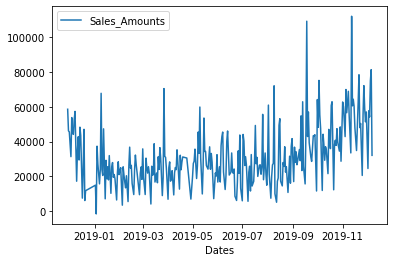

In [60]:
ax = total_revenue_bydate.plot.line(x='Dates', y='Sales_Amounts')

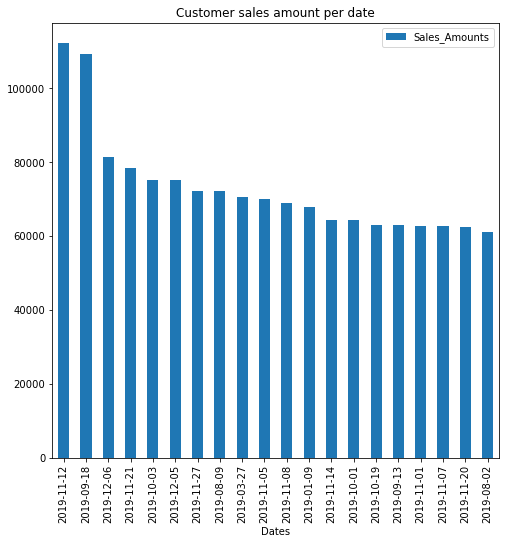

In [61]:
total_revenue_bydatesorted_desc= total_revenue_bydate.sort_values('Sales_Amounts',ascending=False).head(20)
total_revenue_bydatesorted_desc.plot.bar( x = 'Dates', y = ["Sales_Amounts"], title="Customer sales amount per date", figsize=(8, 8));
plt.show()


In [62]:
#3d Find total item purchase by month of the year (to find the month of the year with the highest purchases)
total_revenue_bymonth = dfclean.groupby('month').Sales_Amounts.sum().reset_index()
total_revenue_bymonth

,month,Sales_Amounts
0,April,475780.001
1,August,725412.070
2,December,969285.180
3,February,492349.140
4,January,609481.930
5,July,704438.401
6,June,651601.730
7,March,663890.700
8,May,769062.060
9,November,1601115.490


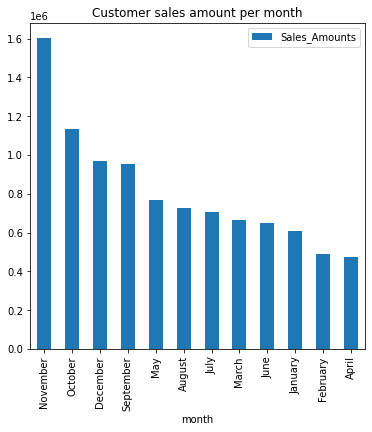

In [63]:
total_revenue_bymonthsorted_desc= total_revenue_bymonth.sort_values('Sales_Amounts',ascending=False)

total_revenue_bymonthsorted_desc.plot.bar( x = 'month', y = ["Sales_Amounts"], title="Customer sales amount per month", figsize=(6, 6));
plt.show()


The bar chart shows that the company generated the most sale revenue in the month of november, octerber, december and october and the can be attributed to the fact the this months are within the chrismas period when friends and family buy gifts for each other

In [64]:
#3d Calculate total revenue( to see the financial stand of the business)
total_revenue = dfclean.Sales_Amounts.sum()
total_revenue

9747747.933999998

In [65]:
#to find the number of item with negative quantity showing item lost, returned or distroyed
no_sales_item = (dfclean['Quantity'] < 0).sum()
no_sales_item

10624

HYPOTHESIS TESTING

QUESTION: Does the price affect quantity purchase

- H0 = The price of the product does has no effect on the quantity purchased
- H1 =  The price of the product has an effect on the quantity purchased

DESCISION RULE
- Accept the null hypothesis if p-value is greater than  alpha 0.05 
- Reject the null hypothesis if p-value is less than alpha.

WHERE 
- alpha = 0.05

In [66]:
testprice =ttest_ind(dfclean['Quantity'], dfclean['UnitPrice']) 
testprice

Ttest_indResult(statistic=15.24580774946657, pvalue=1.777685360530201e-52)

CONCLUSION:The T-zest result above shows a p-value of 1.7776. Since the p-value is greater than alpha (0.005) we accept the the null hypothesis nad reject the alternative hypothesis implying that The price of the product does has no effect on the quantity purchased.

QUESTION: Does the season affect quantity purchase
- H0 = The is no difference betweenthe quantity of goods purchases purchased in the different seasons
- H1 = The is a difference betweenthe quantity of goods purchases purchased in the different seasons

DESCISION RULE
- Accept the null hypothesis if p-value is greater than  alpha 0.05 
- Reject the null hypothesis if p-value is less than alpha.

WHERE 
- alpha = 0.05

In [67]:
season_dict = {'January': 'Winter',
               'February': 'Winter',
               'March': 'Spring', 
               'April': 'Spring',
               'May': 'Spring',
               'June': 'Summer',
               'July': 'Summer',
               'August': 'Summer',
               'September': 'Fall',
               'October': 'Fall',
               'November': 'Fall',
               'December': 'Winter'}
dfclean['Season'] = dfclean['month'].apply(lambda x: season_dict[x])

In [68]:
dfclean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 13 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   InvoiceNo      541909 non-null  object        
 1   StockCode      541909 non-null  object        
 2   Description    540455 non-null  object        
 3   Quantity       541909 non-null  int64         
 4   InvoiceDate    541909 non-null  datetime64[ns]
 5   UnitPrice      541909 non-null  float64       
 6   CustomerID     406829 non-null  object        
 7   day            541909 non-null  object        
 8   month          541909 non-null  object        
 9   Sales_Amounts  541909 non-null  float64       
 10  DayOfWeek      541909 non-null  object        
 11  Dates          541909 non-null  object        
 12  Season         541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(9)
memory usage: 53.7+ MB


In [69]:
dfclean['Season'] = dfclean['Season'].astype('category')

In [70]:
dfclean.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,day,month,Sales_Amounts,DayOfWeek,Dates,Season
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2018-11-29 08:26:00,2.55,17850.0,Thursday,November,15.30,Thursday,2018-11-29,Fall
1,536365,71053,WHITE METAL LANTERN,6,2018-11-29 08:26:00,3.39,17850.0,Thursday,November,20.34,Thursday,2018-11-29,Fall
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2018-11-29 08:26:00,2.75,17850.0,Thursday,November,22.00,Thursday,2018-11-29,Fall
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2018-11-29 08:26:00,3.39,17850.0,Thursday,November,20.34,Thursday,2018-11-29,Fall
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2018-11-29 08:26:00,3.39,17850.0,Thursday,November,20.34,Thursday,2018-11-29,Fall


In [71]:
#define samples
group1 = dfclean[dfclean['Season']=='Winter']
group2 = dfclean[dfclean['Season']=='Spring']
group3 = dfclean[dfclean['Season']=='Summer']
group4 = dfclean[dfclean['Season']=='Fall']

#perform independent two sample t-test
test1 =ttest_ind(group1['Quantity'], group2['Quantity']) 
test2 = ttest_ind(group3['Quantity'], group4['Quantity'])
print(test1, test2)

Ttest_indResult(statistic=-0.7354782650518242, pvalue=0.4620490334747628) Ttest_indResult(statistic=3.4886144418834477, pvalue=0.00048559709752873963)


CONCLUSION: after grouping the season and performing a T-test on the seasons as test1 and test2 and the results shows that the p-values of test1 (winter and spring) is 0.46 and the p-values of test2(summer and fall) is 0.00049 . since the p_value of test1 is greater than alpha(0.05) we fail to reject Null Hypothesis and conclude that there is no prove that the samples are different. therefore we can say there is no difference in the quantity of goods purchased in the winter/spring seasons.
The P-value of test2(summer and Fall) is less than 0.05 so we reject the Null hypothesis and conclude that the samples are diiferent. therefore, we can say there is a difference in the quantity of goods purchased in the Summer/Fall seasons.

In [72]:
# print the time period
print('Min : {}, Max : {}'.format(min(dfclean.InvoiceDate), max(dfclean.InvoiceDate)))

Min : 2018-11-29 08:26:00, Max : 2019-12-07 12:50:00


GENERAL CONCLUSION AND RECOMMENDATION

CONCLUSION
- The period of the analysis is from 2018-11-29 to 2019-12-07 (abou 1 year)
- The online shop has a total unique product of 4070
- The total revenue generated with this perion is 9747747.9
- The highest selling product within this period is WORLD WAR 2 GLIDERS ASSTD DESIGNS
- The lowest selling product within period is MUMMY MOUSE RED GINGHAM RIBBON
- From the line graph showing the total quantity and revenue generated by date we see that its not a straight line it shows a fluntuation in the quantity and revenue by dates. however, the month with the highest sales are novemeber, october, september and december. also the day with the highest quantity sold is friday.
- The highest revenue generating items are not the same as items with the highest quantity purchased

RECOMMENDATION
- Stock more of the product bought frequently  especially during the season with high number of sales
- Reduce the stocking of product bought less frequent within the period espacially product the was bought just once within the period of 1 year
- The company marketing team should design a marketing strategy tailored to this different groups of customers to increase their patronage.
